In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import keras
from keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import pickle


In [ ]:
df = pd.read_excel('data_hourly.xlsx')
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop(['real_volume','spread'], inplace=True, axis=1)
df.head()

,time,open,high,low,close,tick_volume
0,2012-01-02 00:00:00,1.29443,1.29525,1.29368,1.29429,1215
1,2012-01-02 01:00:00,1.29434,1.29486,1.29315,1.29410,784
2,2012-01-02 02:00:00,1.29418,1.29471,1.29359,1.29387,890
3,2012-01-02 03:00:00,1.29387,1.29391,1.29220,1.29307,712
4,2012-01-02 04:00:00,1.29308,1.29464,1.29211,1.29255,1200


In [ ]:
df['HLAvg'] = df['high'].add(df['low']).div(2)
df.head()

,time,open,high,low,close,tick_volume,HLAvg
0,2012-01-02 00:00:00,1.29443,1.29525,1.29368,1.29429,1215,1.294465
1,2012-01-02 01:00:00,1.29434,1.29486,1.29315,1.29410,784,1.294005
2,2012-01-02 02:00:00,1.29418,1.29471,1.29359,1.29387,890,1.294150
3,2012-01-02 03:00:00,1.29387,1.29391,1.29220,1.29307,712,1.293055
4,2012-01-02 04:00:00,1.29308,1.29464,1.29211,1.29255,1200,1.293375


In [ ]:
df['MA'] = df['HLAvg'].rolling(window=14).mean()    # We chose 14 as this is the default period used in most technical analysis tools
            # Because the window = 14 ... the first 13 row in MA will be NaN and then they will have a value .. So we may delete them
df

,time,open,high,low,close,tick_volume,HLAvg,MA
0,2012-01-02 00:00:00,1.29443,1.29525,1.29368,1.29429,1215,1.294465,NaN
1,2012-01-02 01:00:00,1.29434,1.29486,1.29315,1.29410,784,1.294005,NaN
2,2012-01-02 02:00:00,1.29418,1.29471,1.29359,1.29387,890,1.294150,NaN
3,2012-01-02 03:00:00,1.29387,1.29391,1.29220,1.29307,712,1.293055,NaN
4,2012-01-02 04:00:00,1.29308,1.29464,1.29211,1.29255,1200,1.293375,NaN
...,...,...,...,...,...,...,...,...
64624,2022-06-03 04:00:00,1.07587,1.07619,1.07532,1.07598,2247,1.075755,1.073568
64625,2022-06-03 05:00:00,1.07598,1.07638,1.07558,1.07575,1633,1.075980,1.073992
64626,2022-06-03 06:00:00,1.07578,1.07599,1.07520,1.07533,1507,1.075595,1.074379
64627,2022-06-03 07:00:00,1.07534,1.07545,1.07458,1.07458,1350,1.075015,1.074689


In [ ]:
df['Returns'] = np.log(df['MA']/df['MA'].shift(1))
df

,time,open,high,low,close,tick_volume,HLAvg,MA,Returns
0,2012-01-02 00:00:00,1.29443,1.29525,1.29368,1.29429,1215,1.294465,NaN,NaN
1,2012-01-02 01:00:00,1.29434,1.29486,1.29315,1.29410,784,1.294005,NaN,NaN
2,2012-01-02 02:00:00,1.29418,1.29471,1.29359,1.29387,890,1.294150,NaN,NaN
3,2012-01-02 03:00:00,1.29387,1.29391,1.29220,1.29307,712,1.293055,NaN,NaN
4,2012-01-02 04:00:00,1.29308,1.29464,1.29211,1.29255,1200,1.293375,NaN,NaN
...,...,...,...,...,...,...,...,...,...
64624,2022-06-03 04:00:00,1.07587,1.07619,1.07532,1.07598,2247,1.075755,1.073568,0.000447
64625,2022-06-03 05:00:00,1.07598,1.07638,1.07558,1.07575,1633,1.075980,1.073992,0.000395
64626,2022-06-03 06:00:00,1.07578,1.07599,1.07520,1.07533,1507,1.075595,1.074379,0.000360
64627,2022-06-03 07:00:00,1.07534,1.07545,1.07458,1.07458,1350,1.075015,1.074689,0.000288


In [ ]:
df=df.dropna()

In [ ]:
df=df.reset_index()
df=df.drop("index",axis=1)

#Batch size

In [ ]:
batch_size=32
reminder=df.shape[0]%batch_size
print(reminder)
df=df.drop(df.index[:reminder])
df

7


,time,open,high,low,close,tick_volume,HLAvg,MA,Returns
7,2012-01-02 21:00:00,1.29274,1.29297,1.29212,1.29260,1305,1.292545,1.293479,-0.000043
8,2012-01-02 22:00:00,1.29258,1.29347,1.29258,1.29332,1279,1.293025,1.293443,-0.000028
9,2012-01-02 23:00:00,1.29331,1.29354,1.29312,1.29338,1044,1.293330,1.293361,-0.000064
10,2012-01-03 00:00:00,1.29337,1.29392,1.29316,1.29353,1510,1.293540,1.293234,-0.000098
11,2012-01-03 01:00:00,1.29352,1.29582,1.29346,1.29517,2544,1.294640,1.293220,-0.000011
...,...,...,...,...,...,...,...,...,...
64610,2022-06-03 04:00:00,1.07587,1.07619,1.07532,1.07598,2247,1.075755,1.073568,0.000447
64611,2022-06-03 05:00:00,1.07598,1.07638,1.07558,1.07575,1633,1.075980,1.073992,0.000395
64612,2022-06-03 06:00:00,1.07578,1.07599,1.07520,1.07533,1507,1.075595,1.074379,0.000360
64613,2022-06-03 07:00:00,1.07534,1.07545,1.07458,1.07458,1350,1.075015,1.074689,0.000288


In [ ]:
df=df.reset_index()
df=df.drop("index",axis=1)
df=df.set_index("time")
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns
time,,,,,,,,
2012-01-02 21:00:00,1.29274,1.29297,1.29212,1.29260,1305,1.292545,1.293479,-0.000043
2012-01-02 22:00:00,1.29258,1.29347,1.29258,1.29332,1279,1.293025,1.293443,-0.000028
2012-01-02 23:00:00,1.29331,1.29354,1.29312,1.29338,1044,1.293330,1.293361,-0.000064
2012-01-03 00:00:00,1.29337,1.29392,1.29316,1.29353,1510,1.293540,1.293234,-0.000098
2012-01-03 01:00:00,1.29352,1.29582,1.29346,1.29517,2544,1.294640,1.293220,-0.000011
...,...,...,...,...,...,...,...,...
2022-06-03 04:00:00,1.07587,1.07619,1.07532,1.07598,2247,1.075755,1.073568,0.000447
2022-06-03 05:00:00,1.07598,1.07638,1.07558,1.07575,1633,1.075980,1.073992,0.000395
2022-06-03 06:00:00,1.07578,1.07599,1.07520,1.07533,1507,1.075595,1.074379,0.000360


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["scaled_return"]= scaler.fit_transform(df[['Returns']].values)



In [ ]:
pickle.dump(scaler,open("scaler.bin",'wb'))

In [ ]:
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return
time,,,,,,,,,
2012-01-02 21:00:00,1.29274,1.29297,1.29212,1.29260,1305,1.292545,1.293479,-0.000043,0.487354
2012-01-02 22:00:00,1.29258,1.29347,1.29258,1.29332,1279,1.293025,1.293443,-0.000028,0.490490
2012-01-02 23:00:00,1.29331,1.29354,1.29312,1.29338,1044,1.293330,1.293361,-0.000064,0.483210
2012-01-03 00:00:00,1.29337,1.29392,1.29316,1.29353,1510,1.293540,1.293234,-0.000098,0.476208
2012-01-03 01:00:00,1.29352,1.29582,1.29346,1.29517,2544,1.294640,1.293220,-0.000011,0.493794
...,...,...,...,...,...,...,...,...,...
2022-06-03 04:00:00,1.07587,1.07619,1.07532,1.07598,2247,1.075755,1.073568,0.000447,0.586720
2022-06-03 05:00:00,1.07598,1.07638,1.07558,1.07575,1633,1.075980,1.073992,0.000395,0.576226
2022-06-03 06:00:00,1.07578,1.07599,1.07520,1.07533,1507,1.075595,1.074379,0.000360,0.569116


In [ ]:
df.to_excel("final_Hour_df.xlsx")

In [ ]:
features=df.drop(["open","high","low","HLAvg","MA","Returns","close","tick_volume"],axis=1)


In [ ]:
train_size=int((0.8*df.shape[0])-((0.8*df.shape[0])% batch_size))
print(train_size)
test_size=(df.shape[0]-train_size)//2
print(test_size)

val_size=(df.shape[0]-train_size)//2
print(val_size)

window_size=2*batch_size #64 hours
df_train = features[:- val_size - test_size]
df_val = features[- val_size - test_size - window_size:- test_size]
df_test = features[- test_size - window_size:]




51680
6464
6464


In [ ]:
df_test


,scaled_return
time,
2021-05-19 01:00:00,0.512570
2021-05-19 02:00:00,0.502195
2021-05-19 03:00:00,0.512450
2021-05-19 04:00:00,0.508833
2021-05-19 05:00:00,0.490874
...,...
2022-06-03 04:00:00,0.586720
2022-06-03 05:00:00,0.576226
2022-06-03 06:00:00,0.569116


In [ ]:

def features_labels1(values):
  x,y=[],[]
  for i in range(window_size, len(values)):
        x.append(values[i-window_size:i])
        y.append(values[i])

  x=np.array(x)
  y=np.array(y)
  x = np.reshape(x, (x.shape[0], x.shape[1], 1))

  return x,y

In [ ]:

def features_labels2(df):
  x,y=[],[]
  for i in range(df.shape[0]-window_size-1):
    x.append(np.array(df[i:i+window_size]))
    y.append(features['scaled_return'].iloc[i+window_size])
    

  x=np.array(x)
  y=np.array(y)
  return x,y

In [ ]:
x_train,y_train=features_labels1(features[['scaled_return']].values)
x_val,y_val=features_labels1(df_val[['scaled_return']].values)


In [ ]:
x_train.shape

(64544, 64, 1)

In [ ]:
model = keras.models.Sequential()
model.add(layers.LSTM(76, input_shape=(x_train.shape[1], 1), return_sequences = False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))
model.compile(loss="mse", optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 76)                23712     
                                                                 
 dropout (Dropout)           (None, 76)                0         
                                                                 
 dense (Dense)               (None, 1)                 77        
                                                                 
Total params: 23,789
Trainable params: 23,789
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x=x_train, y=y_train ,epochs=50,batch_size=32,validation_data=(x_val,y_val),shuffle=False)

Epoch 1/50
2017/2017 [==============================] - 17s 5ms/step - loss: 0.0024 - accuracy: 3.0987e-05 - val_loss: 4.9412e-04 - val_accuracy: 0.0000e+00
Epoch 2/50
2017/2017 [==============================] - 10s 5ms/step - loss: 9.4296e-04 - accuracy: 3.0987e-05 - val_loss: 2.9504e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
2017/2017 [==============================] - 10s 5ms/step - loss: 5.5029e-04 - accuracy: 3.0987e-05 - val_loss: 1.9663e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
2017/2017 [==============================] - 10s 5ms/step - loss: 3.4206e-04 - accuracy: 3.0987e-05 - val_loss: 1.5671e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
2017/2017 [==============================] - 10s 5ms/step - loss: 2.8137e-04 - accuracy: 3.0987e-05 - val_loss: 1.5981e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
2017/2017 [==============================] - 10s 5ms/step - loss: 2.6720e-04 - accuracy: 3.0987e-05 - val_loss: 1.5324e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
2017/2017 [================

In [ ]:
y_pred=model.predict(x_train)

In [ ]:
len(np.unique(y_pred))/len(y_pred)

0.990657535944472

In [ ]:
filename = 'finalized_model.sav'
keras.models.save_model(model, filename)


INFO:tensorflow:Assets written to: finalized_model.sav/assets


INFO:tensorflow:Assets written to: finalized_model.sav/assets


In [ ]:
import os

In [ ]:
!zip -r /content/file.zip /content/finalized_model.sav/


  adding: content/finalized_model.sav/ (stored 0%)
  adding: content/finalized_model.sav/saved_model.pb (deflated 90%)
  adding: content/finalized_model.sav/assets/ (stored 0%)
  adding: content/finalized_model.sav/variables/ (stored 0%)
  adding: content/finalized_model.sav/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/finalized_model.sav/variables/variables.index (deflated 60%)
  adding: content/finalized_model.sav/keras_metadata.pb (deflated 86%)


In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf

In [ ]:
df=pd.read_excel("final_Hour_df.xlsx")
df=df.set_index("time")
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return
time,,,,,,,,,
2012-01-02 21:00:00,1.29274,1.29297,1.29212,1.29260,1305,1.292545,1.293479,-0.000043,0.487354
2012-01-02 22:00:00,1.29258,1.29347,1.29258,1.29332,1279,1.293025,1.293443,-0.000028,0.490490
2012-01-02 23:00:00,1.29331,1.29354,1.29312,1.29338,1044,1.293330,1.293361,-0.000064,0.483210
2012-01-03 00:00:00,1.29337,1.29392,1.29316,1.29353,1510,1.293540,1.293234,-0.000098,0.476208
2012-01-03 01:00:00,1.29352,1.29582,1.29346,1.29517,2544,1.294640,1.293220,-0.000011,0.493794
...,...,...,...,...,...,...,...,...,...
2022-06-03 04:00:00,1.07587,1.07619,1.07532,1.07598,2247,1.075755,1.073568,0.000447,0.586720
2022-06-03 05:00:00,1.07598,1.07638,1.07558,1.07575,1633,1.075980,1.073992,0.000395,0.576226
2022-06-03 06:00:00,1.07578,1.07599,1.07520,1.07533,1507,1.075595,1.074379,0.000360,0.569116


In [ ]:
features=df.drop(["open","high","low","HLAvg","MA","Returns",'close','tick_volume'],axis=1)

In [ ]:
from tensorflow import keras
#model = keras.models.load_model('')
scaler=pickle.load(open("scaler.bin",'rb'))
model = tf.keras.models.load_model("finalized_model.sav")


In [ ]:
window_size=64
def features_labels1(values):
  x,y=[],[]
  for i in range(window_size, len(values)):
        x.append(values[i-window_size:i])
        y.append(values[i])

  x=np.array(x)
  y=np.array(y)
  x = np.reshape(x, (x.shape[0], x.shape[1], 1))

  return x,y

x,y=features_labels1(features[['scaled_return']].values)

In [ ]:
x.shape

(64544, 64, 1)

In [ ]:
y_pred=model.predict(x)

In [ ]:
y_pred.shape

(64544, 1)

In [ ]:
df.shape

(64608, 9)

In [ ]:
df['pred_scaled'] = np.pad(y_pred.reshape(y_pred.shape[0]), (window_size, 0), mode='constant', constant_values=np.nan)


In [ ]:
df['pred_returns'] = scaler.inverse_transform(df[['pred_scaled']].values)
df

,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return,pred_scaled,pred_returns
time,,,,,,,,,,,
2012-01-02 21:00:00,1.29274,1.29297,1.29212,1.29260,1305,1.292545,1.293479,-0.000043,0.487354,NaN,NaN
2012-01-02 22:00:00,1.29258,1.29347,1.29258,1.29332,1279,1.293025,1.293443,-0.000028,0.490490,NaN,NaN
2012-01-02 23:00:00,1.29331,1.29354,1.29312,1.29338,1044,1.293330,1.293361,-0.000064,0.483210,NaN,NaN
2012-01-03 00:00:00,1.29337,1.29392,1.29316,1.29353,1510,1.293540,1.293234,-0.000098,0.476208,NaN,NaN
2012-01-03 01:00:00,1.29352,1.29582,1.29346,1.29517,2544,1.294640,1.293220,-0.000011,0.493794,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03 04:00:00,1.07587,1.07619,1.07532,1.07598,2247,1.075755,1.073568,0.000447,0.586720,0.589501,0.000461
2022-06-03 05:00:00,1.07598,1.07638,1.07558,1.07575,1633,1.075980,1.073992,0.000395,0.576226,0.584983,0.000438
2022-06-03 06:00:00,1.07578,1.07599,1.07520,1.07533,1507,1.075595,1.074379,0.000360,0.569116,0.579563,0.000412


In [ ]:
df['pred_MA'] = df['MA'].mul(np.exp(df['pred_returns'].shift(-1))).shift(1) # Log Returns
df


,open,high,low,close,tick_volume,HLAvg,MA,Returns,scaled_return,pred_scaled,pred_returns,pred_MA
time,,,,,,,,,,,,
2012-01-02 21:00:00,1.29274,1.29297,1.29212,1.29260,1305,1.292545,1.293479,-0.000043,0.487354,NaN,NaN,NaN
2012-01-02 22:00:00,1.29258,1.29347,1.29258,1.29332,1279,1.293025,1.293443,-0.000028,0.490490,NaN,NaN,NaN
2012-01-02 23:00:00,1.29331,1.29354,1.29312,1.29338,1044,1.293330,1.293361,-0.000064,0.483210,NaN,NaN,NaN
2012-01-03 00:00:00,1.29337,1.29392,1.29316,1.29353,1510,1.293540,1.293234,-0.000098,0.476208,NaN,NaN,NaN
2012-01-03 01:00:00,1.29352,1.29582,1.29346,1.29517,2544,1.294640,1.293220,-0.000011,0.493794,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03 04:00:00,1.07587,1.07619,1.07532,1.07598,2247,1.075755,1.073568,0.000447,0.586720,0.589501,0.000461,1.073582
2022-06-03 05:00:00,1.07598,1.07638,1.07558,1.07575,1633,1.075980,1.073992,0.000395,0.576226,0.584983,0.000438,1.074038
2022-06-03 06:00:00,1.07578,1.07599,1.07520,1.07533,1507,1.075595,1.074379,0.000360,0.569116,0.579563,0.000412,1.074434


In [ ]:
df=df[window_size:]

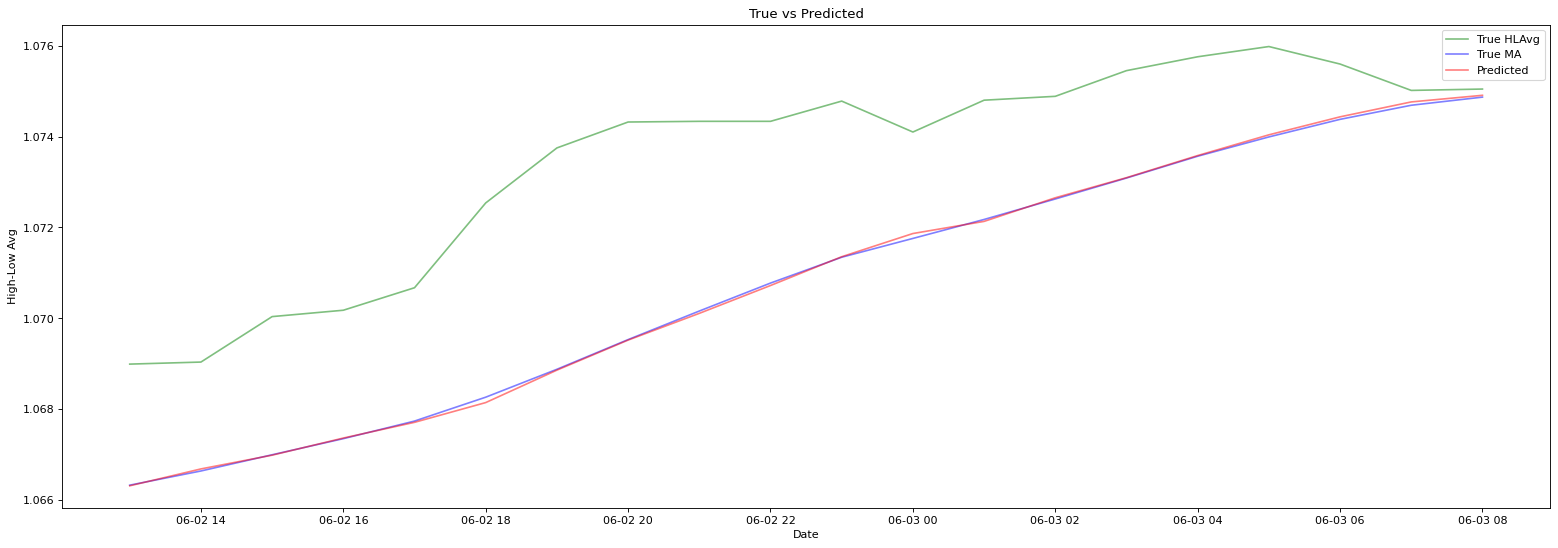

In [ ]:
plt.figure(figsize=(24, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(df['HLAvg'][-20:], color = 'green', label = 'True HLAvg', alpha=0.5)
plt.plot(df['MA'][-20:], color = 'blue', label = 'True MA', alpha=0.5)
plt.plot(df['pred_MA'][-20:], color = 'red', label = 'Predicted', alpha=0.5)
plt.title('True vs Predicted')
plt.xlabel('Date')
plt.ylabel('High-Low Avg')
plt.legend()
plt.show()